## C3: Technical Lesson

### Step 1: Loading Time Series Data

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the 'co2' dataset from statsmodels
data_set = sm.datasets.co2.load()

# Convert dataset into a pandas DataFrame
CO2 = pd.DataFrame(data=data_set['data'])

# Display the first few rows
print(CO2.head())

              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


### Step 2: Date Indexing

In [2]:
# Confirm that the index is a DatetimeIndex
if isinstance(CO2.index, pd.DatetimeIndex):
    CO2.index.name = 'date'
else:
    CO2.rename(columns={'index':'date'}, inplace=True)
    CO2.set_index('date', inplace=True)

# Display the index information
print(CO2.index)

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', name='date', length=2284, freq='W-SAT')


### Step 3: Resampling Time Series Data

In [3]:
# Resample the time series into monthly averages
CO2_monthly_mean = CO2['co2'].resample('MS').mean()

# Display the first few rows
print(CO2_monthly_mean.head(10))


date
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
1958-08-01    314.950000
1958-09-01    313.500000
1958-10-01           NaN
1958-11-01    313.425000
1958-12-01    314.700000
Freq: MS, Name: co2, dtype: float64


### Step 4: Time-Series Index Slicing for Data Selection

In [4]:
# Select data from January 1990 onwards
CO2_filtered = CO2_monthly_mean['1990':]

# Select data between January 1990 and January 1991
CO2_subset = CO2_monthly_mean['1990-01-01':'1991-01-01']

# Display results
print(CO2_filtered.head())
print(CO2_subset)

date
1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
Freq: MS, Name: co2, dtype: float64
date
1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
1990-06-01    356.080
1990-07-01    354.675
1990-08-01    352.900
1990-09-01    350.940
1990-10-01    351.225
1990-11-01    352.700
1990-12-01    354.140
1991-01-01    354.675
Freq: MS, Name: co2, dtype: float64


### Step 5: Handling Missing Values

In [5]:
# Check for missing values
print("Missing values:", CO2_monthly_mean.isna().sum())

# Fill missing values using backward fill
CO2_cleaned = CO2_monthly_mean.bfill()

# Verify missing values are handled
print("Missing values after filling:", CO2_cleaned.isna().sum())


Missing values: 5
Missing values after filling: 0


### Step 6: Creating a Time Series Line Plot

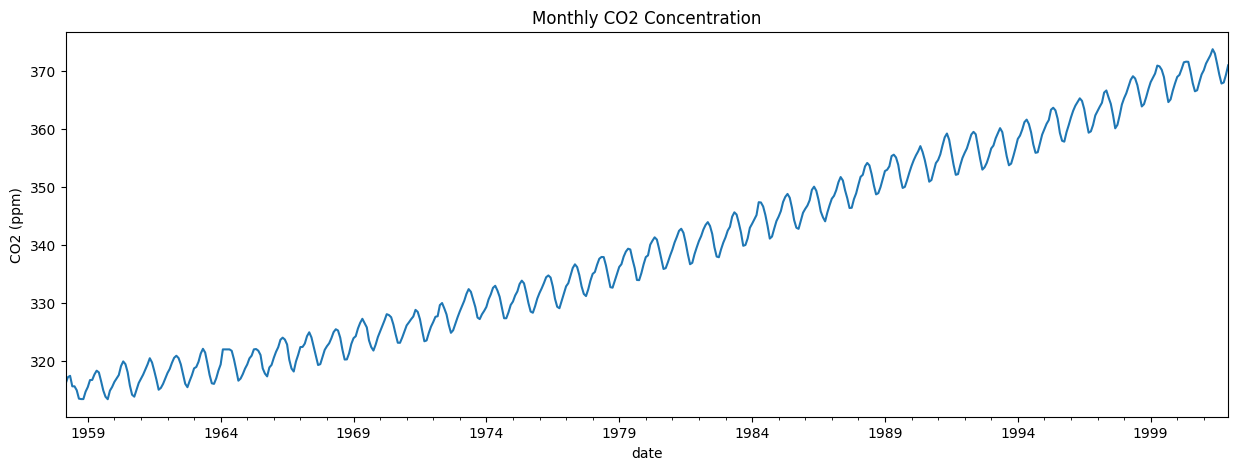

In [6]:
# Plot the time series
CO2_cleaned.plot(figsize=(15,5), title="Monthly CO2 Concentration", ylabel="CO2 (ppm)")
plt.show()


### Step 7: Creating a Time Series Dot Plot

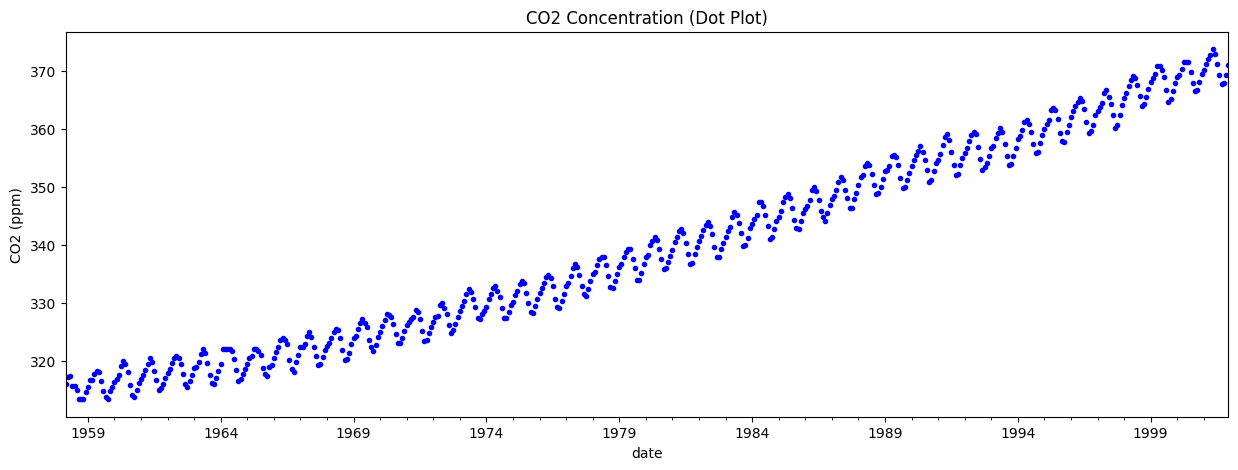

In [7]:
# Plot the time series using dots
CO2_cleaned.plot(figsize=(15,5), style='b.', title="CO2 Concentration (Dot Plot)", ylabel="CO2 (ppm)")
plt.show()


### Step 8: Grouping and Visualizing Time Series Data

<ipython-input-8-3acef0491f2f>:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  year_groups = CO2_cleaned.groupby(pd.Grouper(freq='A'))


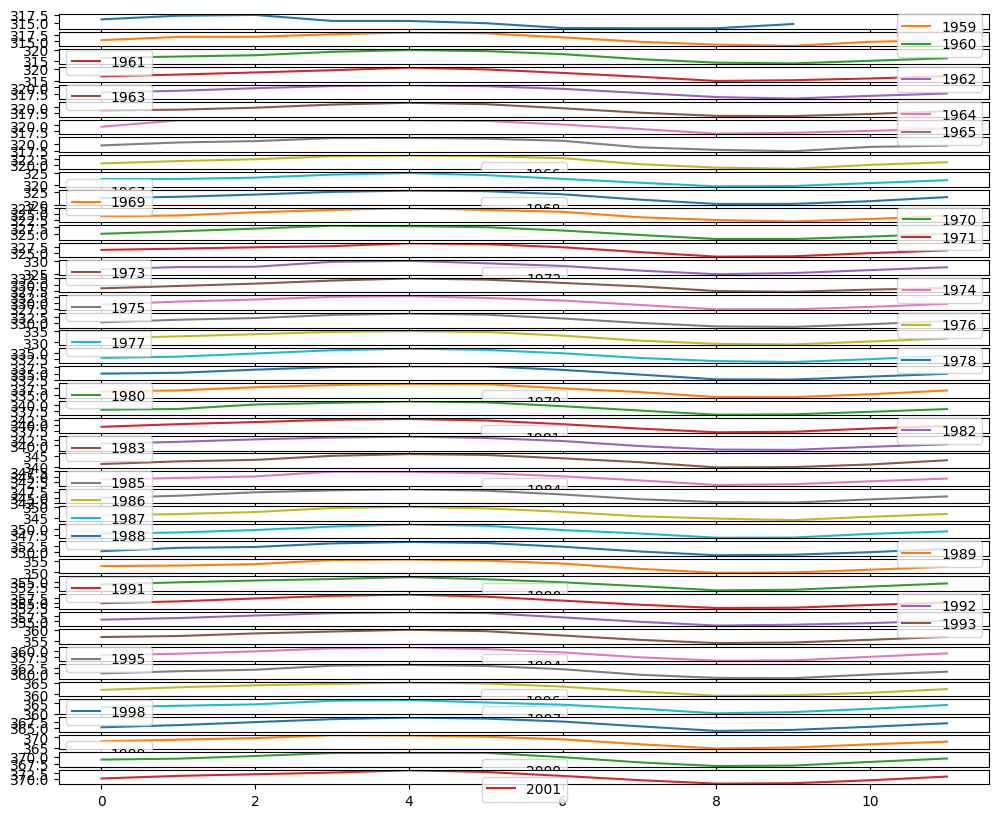

In [8]:
# Group by year
year_groups = CO2_cleaned.groupby(pd.Grouper(freq='A'))

# Create a DataFrame to store yearly values
CO2_annual = pd.DataFrame()

for yr, group in year_groups:
    # Ensure CO2_annual has enough rows to accommodate the data
    if len(CO2_annual) < len(group):
        CO2_annual = CO2_annual.reindex(range(len(group))) # Reindex to the correct size
    CO2_annual[yr.year] = group.values.ravel()[:len(CO2_annual)] # Assign values, truncating if necessary

# Plot each year as a separate subplot
CO2_annual.plot(figsize=(12,10), subplots=True, legend=True)
plt.show()


### Step 9: Time Series Histogram

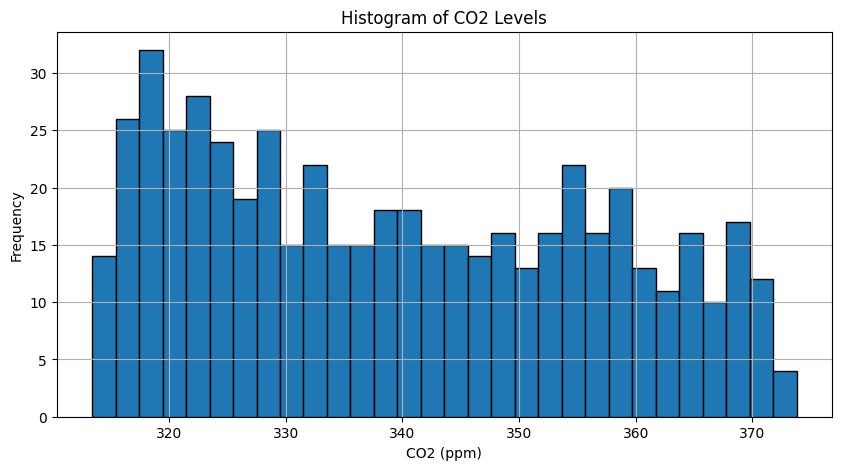

In [9]:
# Create a histogram
CO2_cleaned.hist(figsize=(10,5), bins=30, edgecolor='black')
plt.title("Histogram of CO2 Levels")
plt.xlabel("CO2 (ppm)")
plt.ylabel("Frequency")
plt.show()


### Step 10: Time Series Density Plot

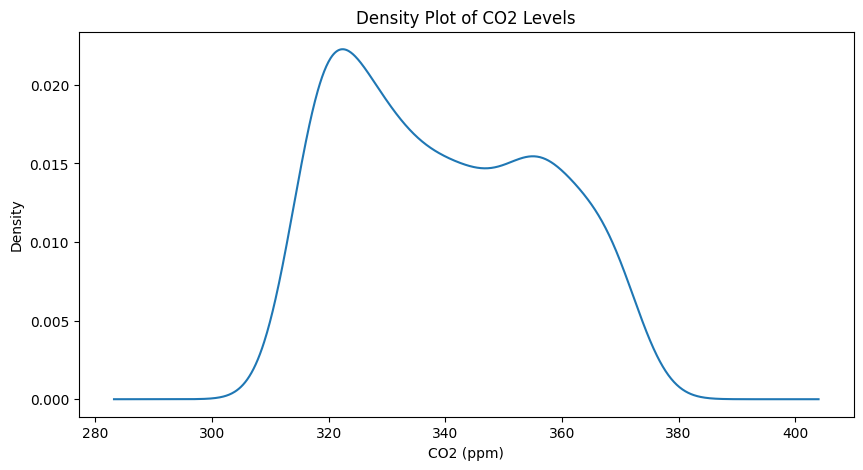

In [10]:
# Create a density plot
CO2_cleaned.plot(kind='kde', figsize=(10,5), title="Density Plot of CO2 Levels")
plt.xlabel("CO2 (ppm)")
plt.show()


### Step 11: Time Series Box and Whisker Plots

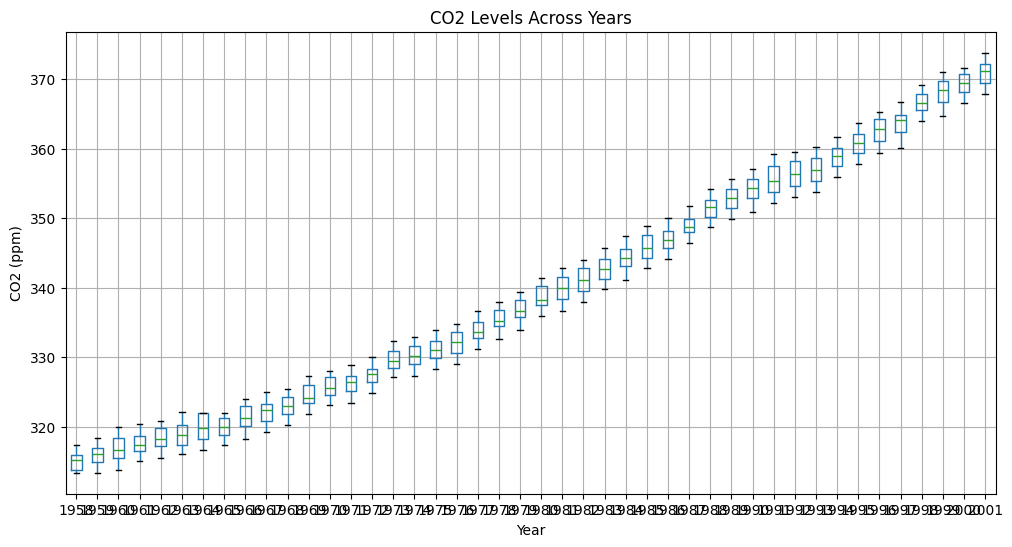

In [11]:
# Generate box plots for each year
CO2_annual.boxplot(figsize=(12,6))
plt.title("CO2 Levels Across Years")
plt.xlabel("Year")
plt.ylabel("CO2 (ppm)")
plt.show()


### Step 12: Creating a Time Series Heat Map

<Figure size 1000x600 with 0 Axes>

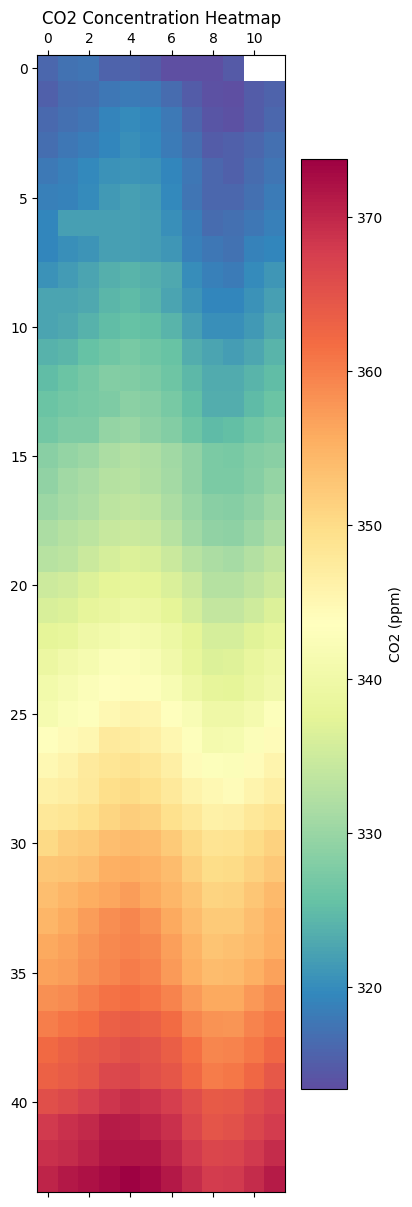

In [12]:
import numpy as np

# Transform data into a matrix format
CO2_matrix = CO2_annual.T

# Generate a heatmap
plt.figure(figsize=(10,6))
plt.matshow(CO2_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.colorbar(label="CO2 (ppm)")
plt.title("CO2 Concentration Heatmap")
plt.show()
